In [1]:
import pandas as pd
import numpy as np
import thinkstats2
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import random
import thinkplot
import math
from scipy import stats
from scipy.stats import chisquare

In [2]:
data = pd.read_csv('G:/Desktop/datasets/flight-delays-spring-2018/flight_delays_train.csv')

In [3]:
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [4]:
data['dep_delayed_15min'] = data['dep_delayed_15min'].map({'Y':1, 'N':0})

In [5]:
d = {'c-7':7, 'c-3':3, 'c-5':5, 'c-6':6, 'c-4':4, 'c-2':2, 'c-1':1}
data['DayOfWeek'] = data['DayOfWeek'].map(d)

In [7]:
data = pd.get_dummies(data, columns=['DayOfWeek'])

KeyError: "None of [Index(['DayOfWeek'], dtype='object')] are in the [columns]"

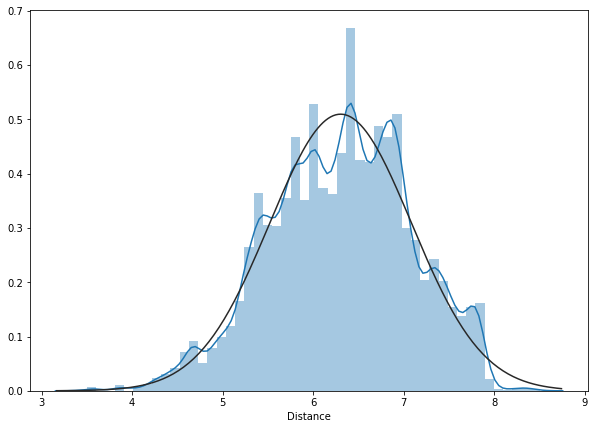

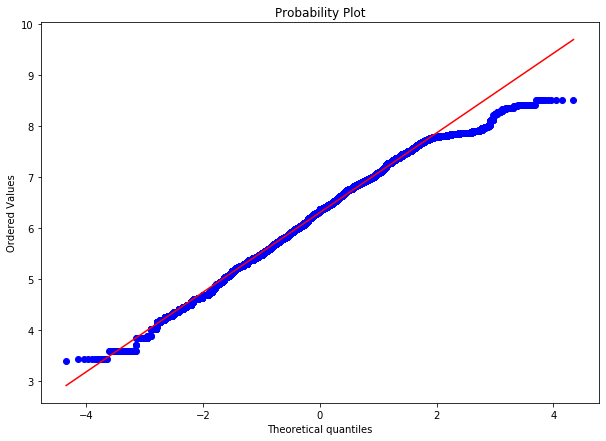

In [8]:
plt.figure(figsize=(10, 7))
sns.distplot(np.log(data['Distance']), fit=scipy.stats.norm);
plt.figure(figsize=(10, 7))
scipy.stats.probplot(np.log(data['Distance']), plot=plt);

In [9]:
data['Distance'] = np.log(data['Distance'])

In [14]:
def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

In [11]:
def Estimate1(n, iters):
    mu = data['Distance'].mean()
    mu1 = data['Distance'].median()
    means = []
    medians = []
    for i in range(iters):
        array = []
        for j in range(n):
            mm = random.randrange(len(data['Distance']))
            a = data['Distance'].iloc[mm]
            array.append(a)
        means.append(np.mean(array))
        medians.append(np.median(array))
    print('Experiment 1')
    print('rmse mean : ', RMSE(means, mu))
    print('rmse median : ', RMSE(medians, mu1))

In [15]:
Estimate1(50, 100)

Experiment 1
rmse mean :  0.11228416413500454
rmse median :  0.15271528265746268


In [17]:
def MeanError(estimates, actual):
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

In [18]:
def Estimate2(n, iters):
    biased = []
    unbiased = []
    dis = data['Distance'].var()
    for i in range(iters):
        array = []
        for j in range(n):
            mm = random.randrange(len(data['Distance']))
            a = data['Distance'].iloc[mm]
            array.append(a)
        biased.append(np.var(array))
        unbiased.append(np.var(array, ddof=1))
    print('mean error biased', MeanError(biased, dis))
    print('mean error unbiased', MeanError(unbiased, dis))
        

In [20]:
Estimate2(7, 100)

mean error biased -0.07872766410710089
mean error unbiased 0.010262662788030862


In [15]:
def SimulateSample(mu, sigma, n, iters):
    means = []
    for i in range(iters):
        array = []
        for j in range(n):
            mm = random.randrange(len(data['Distance']))
            a = data['Distance'].iloc[mm]
            array.append(a)
        means.append(np.mean(array))
    return means

In [16]:
xbars = SimulateSample(data['Distance'].mean(), data['Distance'].std(), 50, 100)

No handles with labels found to put in legend.


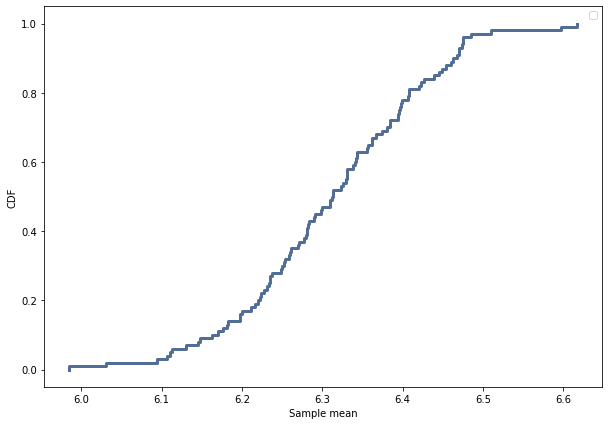

In [17]:
cdf = thinkstats2.Cdf(xbars)
plt.figure(figsize=(10, 7))
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

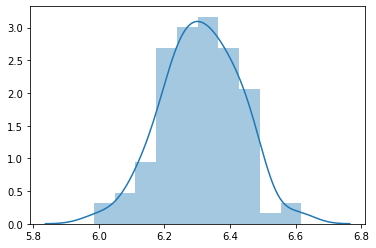

In [18]:
sns.distplot(xbars)

In [19]:
np.mean(xbars)

6.311976075698954

In [20]:
cdf.Percentile(5), cdf.Percentile(95)

(6.109815192481819, 6.475218796460492)

In [21]:
data['Distance'].mean()

6.303921450936712

In [22]:
RMSE(xbars, data['Distance'].mean())

0.11653211788645335

In [23]:
array = []
for j in range(100):
    mm = random.randrange(len(data['Distance']))
    a = data['Distance'].iloc[mm]
    array.append(a)

In [24]:
se = np.std(array)/math.sqrt(100)

In [25]:
se

0.0886901780719073

## 95%

In [26]:
x1 = np.mean(array) - 1.96*se
x2 = np.mean(array) + 1.96*se

In [27]:
x1, x2

(6.125372725327413, 6.47303822336929)

## 99%

In [28]:
x1 = np.mean(array) - 2.58*se
x2 = np.mean(array) + 2.58*se

In [29]:
x1, x2

(6.07038481492283, 6.5280261337738725)

In [30]:
tt = data[data['dep_delayed_15min'] == 1][:80956]
ff = data[data['dep_delayed_15min'] == 0]

In [31]:
tt['Distance'].mean()

6.32532672532065

In [32]:
ff['Distance'].mean()

6.2988860978395955

In [33]:
stats.ttest_ind(tt['Distance'], ff['Distance'][:19044]).pvalue

2.32753876440381e-06

In [34]:
stats.chi2_contingency(data[['dep_delayed_15min','DayOfWeek_1','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']])[1]

0.9999972636550222

In [72]:
abs(tt['Distance'].mean() - ff['Distance'].mean())

4.001457618219206

In [91]:
def sample_a(n):
    array = []
    for i in range(n):
        mm = random.randrange(len(tt['Distance']))
        a = tt['Distance'].iloc[mm]
        array.append(a)
    return array

In [92]:
q = qqq(64)
x = np.mean(q)
mean = data['Distance'].mean()
sigma = np.std(q)/math.sqrt(64)

z = (mean - x) / sigma

In [93]:
z

1.5539540875243683

In [95]:
def p_value(z):
    return scipy.stats.norm.cdf(z)

In [97]:
p_value(z)

0.9399023156795365

In [78]:
abs(tt['Distance'].std() - ff['Distance'].std())

37.111783114783066

In [98]:
n=64
q = qqq(n)
x = np.std(q)
mean = data['Distance'].std()
sigma = np.std(q)/math.sqrt(n)

z = (mean - x) / sigma

In [99]:
p_value(z)

0.572978945852787

In [35]:
ttest_ind(tt['Distance'], ff['Distance']).pvalue

2.7349936458098907e-05

In [ ]:
n=64
q = qqq(n)
x = np.std(q)
mean = data['Distance'].std()
sigma = np.std(q)/math.sqrt(n)

z = (mean - x) / sigma

In [104]:
def sample(n):
    array = []
    for i in range(n):
        mm = random.randrange(len(tt['Distance']))
        a = tt['Distance'].iloc[mm]
        array.append(a)
    return array

In [103]:
chisquare(data['Distance'])

Power_divergenceResult(statistic=45267688.38035158, pvalue=0.0)

In [110]:
observed = sample(100)
chisquare(observed)

Power_divergenceResult(statistic=39605.67733578021, pvalue=0.0)

In [5]:
a

10

In [4]:
a = 10

In [16]:
a

10